In [1]:
import xarray as xr
from ripple_heterogeneity.utils import loading

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
pos_df = loading.load_animal_behavior(r"Z:\Data\HMC1\day8")

In [6]:
pos_df

,time,x,y,z,linearized,units,sr,speed,acceleration,timestamps,epochs,environment
0,9544.563200,NaN,NaN,NaN,NaN,cm,120.0,NaN,0.0,9544.563200,maze_210411_095201,linear
1,9544.571533,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,9544.571533,maze_210411_095201,linear
2,9544.579867,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,9544.579867,maze_210411_095201,linear
3,9544.588200,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,9544.588200,maze_210411_095201,linear
4,9544.596533,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,9544.596533,maze_210411_095201,linear
...,...,...,...,...,...,...,...,...,...,...,...,...
264984,11752.763200,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,11752.763200,maze_210411_095201,linear
264985,11752.771533,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,11752.771533,maze_210411_095201,linear
264986,11752.779867,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,11752.779867,maze_210411_095201,linear
264987,11752.788200,NaN,NaN,NaN,NaN,cm,120.0,NaN,NaN,11752.788200,maze_210411_095201,linear


In [ ]:
da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])

In [2]:
da = xr.DataArray([1, 2, 3, 4, 5], dims=["x"])

In [3]:
da

<xarray.DataArray (x: 5)>
array([1, 2, 3, 4, 5])
Dimensions without coordinates: x

In [2]:
basepath = r"Y:\OJRproject\OJR53_V1JuanAntonio\day21"
st,cm = loading.load_spikes(basepath)

In [16]:
data_array

<xarray.DataArray (time: 16294)>
array([45.16785, 61.7051 , 61.71015, ...,  0.     ,  0.     ,  0.     ])
Dimensions without coordinates: time

In [ ]:
# Create an empty list to store the DataArrays
data_arrays = []
# Iterate over the neurons
# for i, neuron in enumerate(st.data):

# Find the maximum length of the spike timestamps arrays
max_length = max(len(neuron) for neuron in st.data)

# Create an empty list to store the DataArrays
data_arrays = []

# Iterate over the neurons
for i, neuron in enumerate(st.data):
    # Create a DataArray for the current neuron, with the spike timestamps as the values
    data_array = xr.DataArray(data=neuron, dims=("time",))

    # Pad the array with additional time points if it is shorter than the maximum length
    if len(data_array) < max_length:
        data_array = xr.concat([data_array, xr.zeros_like(data_array)[:max_length - len(data_array)]], dim="time")
    data_arrays.append(data_array)

# Use xarray's concat function to combine the DataArrays into a single Dataset
spike_trains = xr.concat(data_arrays, dim="neurons")

# You can also add labels to the dimensions and other metadata as needed
spike_trains.dims = ("time", "neurons")
# spike_trains.coords["neurons"] = ["Neuron 1", "Neuron 2", "Neuron 3", ...]


In [27]:
import xarray as xr
import numpy as np

# Concatenate the spike timestamps from all of the neurons
spike_timestamps = np.concatenate([neuron for neuron in st.data])

# Sort the spike timestamps
sort_idx = np.argsort(spike_timestamps)
spike_timestamps.sort()

# Create an index array to keep track of which neuron each spike belongs to
neuron_index = np.concatenate([np.ones(len(neuron), dtype=int) * i for i, neuron in enumerate(st.data)])
neuron_index = neuron_index[sort_idx]

# Create an xarray DataArray for the spike timestamps
spike_times = xr.DataArray(data=spike_timestamps, dims=("time",))

# Create an xarray DataArray for the neuron index
neuron_idx = xr.DataArray(data=neuron_index, dims=("time",))

# Combine the DataArrays into a single Dataset
spike_trains = xr.Dataset(data_vars={"spike_times": spike_times, "neuron_idx": neuron_idx})

# You can also add labels to the dimensions and other metadata as needed
# spike_trains.dims = ("time",)
spike_trains.coords["neuron_idx"] = np.arange(len(st.data))
spike_trains

<xarray.Dataset>
Dimensions:      (time: 3106149, neuron_idx: 37)
Coordinates:
  * neuron_idx   (neuron_idx) int32 0 1 2 3 4 5 6 7 ... 29 30 31 32 33 34 35 36
Dimensions without coordinates: time
Data variables:
    spike_times  (time) float64 0.0033 0.0056 0.01005 ... 1.78e+04 1.78e+04

In [ ]:
import xarray as xr

# Create an empty Dataset
spike_trains = xr.Dataset()

# Iterate over the neurons
for i, neuron in enumerate(st.data):
  # Create a DataArray for the current neuron, with the spike timestamps as the values
  data_array = xr.DataArray(data=neuron, dims=("time",))
  
  # Add the DataArray to the Dataset as a variable
  spike_trains[f"neuron_{i+1}"] = data_array

# You can also add labels to the dimensions and other metadata as needed
spike_trains.dims = ("time",)
spike_trains.coords["time"] = ["Time 1", "Time 2", "Time 3", ...]


In [71]:
bst = st.bin(ds=.001)
bst

<BinnedSpikeTrainArray at 0x2df56d28550: 37 ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37'] in 17,794,999 bins of width 1.0 milliseconds> for a total of 4:56:34:999 hours

In [41]:
bst.bin_centers

array([3.80000000e-03, 4.80000000e-03, 5.80000000e-03, ...,
       1.77949998e+04, 1.77950008e+04, 1.77950018e+04])

In [44]:
bst.data.shape

(37, 17794999)

In [76]:
spike_trains = xr.DataArray(data=bst.data.T, coords=[bst.bin_centers, bst.series_ids], dims=["time", "neurons"])
spike_trains

<xarray.DataArray (time: 17794999, neurons: 37)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * time     (time) float64 0.0038 0.0048 0.0058 ... 1.779e+04 1.78e+04 1.78e+04
  * neurons  (neurons) int32 1 2 3 4 5 6 7 8 9 10 ... 29 30 31 32 33 34 35 36 37

In [50]:
# Calculate the mean firing rate for each neuron
spike_trains.mean(dim="time")



<xarray.DataArray (neurons: 37)>
array([0.00352532, 0.00033155, 0.02314459, 0.00182917, 0.00063552,
       0.00064546, 0.00033403, 0.00059786, 0.00041461, 0.00085237,
       0.00102141, 0.00222697, 0.00055695, 0.00491425, 0.01855392,
       0.01175235, 0.00722096, 0.01672532, 0.01283574, 0.00713819,
       0.00967547, 0.0053982 , 0.00430082, 0.00327592, 0.00239118,
       0.00124187, 0.00197224, 0.0040086 , 0.01395999, 0.0040952 ,
       0.00141905, 0.00075032, 0.00119876, 0.00085254, 0.00057797,
       0.00371925, 0.00045783])
Coordinates:
  * neurons  (neurons) int32 1 2 3 4 5 6 7 8 9 10 ... 29 30 31 32 33 34 35 36 37

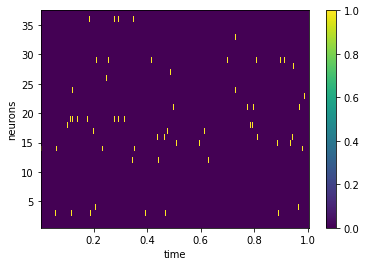

In [89]:
spike_trains.isel(time=slice(None, 1000)).T.plot()


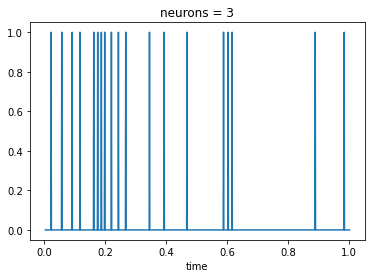

In [110]:
spike_trains.isel(neurons=2,time=slice(None, 1000)).plot()

In [ ]:
spike_trains.groupby_bins()

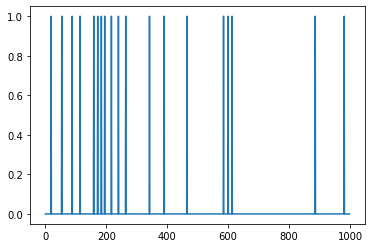

In [112]:
plt.plot(bst.data[2,0:1000])

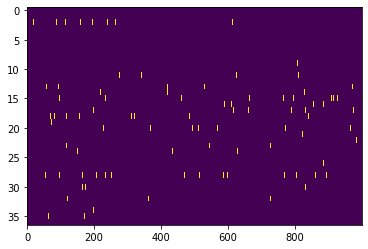

In [101]:
import matplotlib.pyplot as plt
plt.imshow(bst.data[:,0:1000],aspect="auto",interpolation="nearest")

In [51]:
bst.mean()

array([0.00352532, 0.00033155, 0.02314459, 0.00182917, 0.00063552,
       0.00064546, 0.00033403, 0.00059786, 0.00041461, 0.00085237,
       0.00102141, 0.00222697, 0.00055695, 0.00491425, 0.01855392,
       0.01175235, 0.00722096, 0.01672532, 0.01283574, 0.00713819,
       0.00967547, 0.0053982 , 0.00430082, 0.00327592, 0.00239118,
       0.00124187, 0.00197224, 0.0040086 , 0.01395999, 0.0040952 ,
       0.00141905, 0.00075032, 0.00119876, 0.00085254, 0.00057797,
       0.00371925, 0.00045783])

In [69]:
spike_trains.resample("time", freq="s")

ValueError: the first argument to .resample must be a dictionary

In [56]:
correlation = spike_trains[:,1].corr(spike_trains[:,2])
correlation

AttributeError: 'DataArray' object has no attribute 'corr'

In [31]:
import xarray as xr

# Find the maximum length of the spike timestamps arrays
max_length = max(len(neuron) for neuron in st.data)

# Create an empty Dataset
spike_trains = xr.Dataset()

# Iterate over the neurons
for i, neuron in enumerate(st.data):
    # Create a DataArray with all 1s, of the appropriate shape and size
    data_array = xr.ones_like(xr.DataArray(data=np.zeros(max_length), dims=("time",)))

    # Set the values to 0 at the time points where no spike occurred
    data_array[:len(neuron)] = 0
    data_array[neuron] = 1

    # Add the DataArray to the Dataset as a variable
    spike_trains[f"neuron_{i+1}"] = data_array

# You can also add labels to the dimensions and other metadata as needed
spike_trains.dims = ("time",)
# spike_trains.coords["time"] = ["Time 1", "Time 2", "Time 3", ...]


TypeError: invalid indexer array, does not have integer dtype: array([7.15750000e-01, 1.00555000e+00, 1.46435000e+00, ...,
       1.77710805e+04, 1.77721990e+04, 1.77749785e+04])